Commercial_df_2021

In [27]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.split import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.fbprophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error 

from statsmodels.tsa.statespace.sarimax import SARIMAX

import pandas as pd
import numpy as np

import os
import utils.KEprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
year = "2021" 
points_to_predict = 60

In [2]:
import pandas as pd
commercial_df_2021 = pd.read_csv('data/commercial_df_2021.csv', sep=',', index_col=0)

In [3]:
commercial_df_2021 

,DateTime,CUSTOMER,AREA,ISPRIVATEPERSON,Power_Consumption,One_Day_Power,One_Day_Power_NaN,Air Temperature 1 Min_P19,Air Temperature 2 Max_P27,Air Temperature 2 Min_P26,Dew Point Temperature_P39,Precipitation_P7,Relative Humidity_P6,Wind Speed_P4,Price
6944448,2021-01-01 00:00:00,1060753805,Kvarnholmen,Nej,0.001000,0.023940,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944449,2021-01-01 00:00:00,1060766019,Malmen,Nej,0.003267,0.089497,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944451,2021-01-01 00:00:00,1060616621,Malmen,Nej,0.007463,0.196061,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944452,2021-01-01 00:00:00,1060621516,Malmen,Nej,0.000147,0.003123,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944453,2021-01-01 00:00:00,1060601163,Kvarnholmen,Nej,0.004140,0.131690,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14619619,2021-12-31 23:00:00,1060598838,Kvarnholmen,Nej,0.000558,0.036185,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
14619620,2021-12-31 23:00:00,1060598788,Kvarnholmen,Nej,0.000424,0.045261,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
14619621,2021-12-31 23:00:00,1060604204,Kvarnholmen,Nej,0.000432,0.010804,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
14619622,2021-12-31 23:00:00,1060599041,Kvarnholmen,Nej,0.005087,0.132385,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60


In [3]:
commercial_df_2021['DateTime'] = pd.to_datetime(commercial_df_2021['DateTime'])
commercial_df_2021.set_index('DateTime', inplace=True)

In [4]:
commercial_df_2021_subset = commercial_df_2021[['Power_Consumption', 'Price', 'Dew Point Temperature_P39']]

In [5]:
commercial_df_2021

,CUSTOMER,AREA,ISPRIVATEPERSON,Power_Consumption,One_Day_Power,One_Day_Power_NaN,Air Temperature 1 Min_P19,Air Temperature 2 Max_P27,Air Temperature 2 Min_P26,Dew Point Temperature_P39,Precipitation_P7,Relative Humidity_P6,Wind Speed_P4,Price
DateTime,,,,,,,,,,,,,,
2021-01-01 00:00:00,1060753805,Kvarnholmen,Nej,0.001000,0.023940,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
2021-01-01 00:00:00,1060766019,Malmen,Nej,0.003267,0.089497,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
2021-01-01 00:00:00,1060616621,Malmen,Nej,0.007463,0.196061,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
2021-01-01 00:00:00,1060621516,Malmen,Nej,0.000147,0.003123,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
2021-01-01 00:00:00,1060601163,Kvarnholmen,Nej,0.004140,0.131690,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:00:00,1060598838,Kvarnholmen,Nej,0.000558,0.036185,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
2021-12-31 23:00:00,1060598788,Kvarnholmen,Nej,0.000424,0.045261,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
2021-12-31 23:00:00,1060604204,Kvarnholmen,Nej,0.000432,0.010804,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60


In [6]:
commercial_df_2021_resampled  = commercial_df_2021_subset.resample('D').agg({'Power_Consumption': 'sum', 'Price': 'mean', 'Dew Point Temperature_P39':'mean'})

In [7]:
commercial_df_2021_resampled

,Power_Consumption,Price,Dew Point Temperature_P39
DateTime,,,
2021-01-01,129.406048,36.262917,4.133333
2021-01-02,130.231185,43.159167,1.345833
2021-01-03,127.118719,27.283333,0.658333
2021-01-04,151.340661,44.015833,-0.304167
2021-01-05,147.821185,47.370833,-0.379167
...,...,...,...
2021-12-27,163.020006,148.466667,-11.650000
2021-12-28,164.103905,111.252083,-2.041667
2021-12-29,161.262945,153.792083,0.454167


In [8]:
# Resample to every hour, taking mean of values if duplicates
y = commercial_df_2021_resampled
# Fill NaNs in 'Price' column of df_prophet
y['Price'] = y['Price'].fillna(0)

In [9]:
y_train, y_test = temporal_train_test_split(y, test_size=45)

# SARIMA

In [11]:
# Creating train and test set 
train = commercial_df_2021_resampled.Power_Consumption[:-45]
test = commercial_df_2021_resampled.Power_Consumption[-45:]

# Fit a SARIMA(0, 1, 1)(1, 1, 1, 7) model
model = SARIMAX(train, order=(0, 1, 1), seasonal_order=(1, 1, 1, 7))

# Fit the model
model_fit = model.fit(disp=False)

# Make predictions for the last 45 observations in the dataset (this should be replaced by len(test) for your case)
predictions = model_fit.predict(len(train), len(train)+len(test)-1)

# Calculate MAE
#mae = mean_absolute_error(test, predictions)
#print(f"MAE: {mae}")

# Calculate MSE
mse= mean_squared_error(test, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

# Calculate MAE
mae = mean_absolute_error(test, predictions)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test, predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}") 

MSE: 94.48336661793023
RMSE: 9.72025548110389
MAE: 7.730809113508513
MAPE: 4.9241599380471595


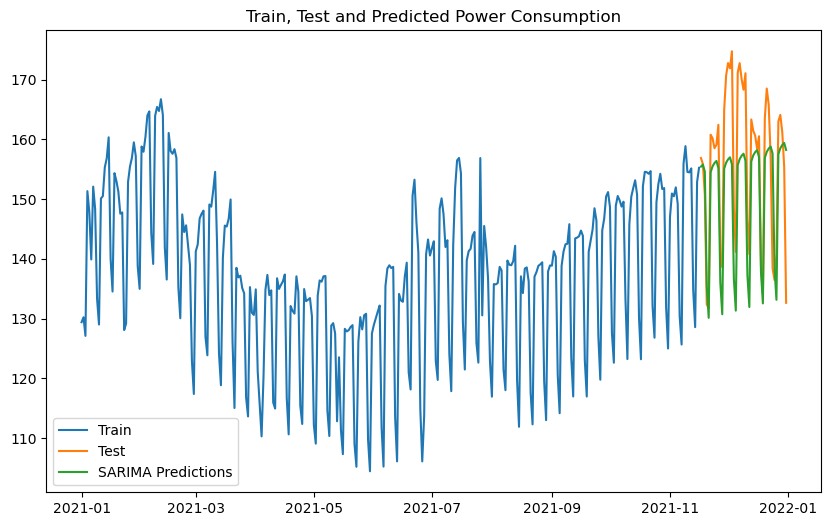

In [12]:
plt.figure(figsize=(10,6))

# Plot the training data
plt.plot(train.index, train.values, label='Train')

# Plot the testing data
plt.plot(test.index, test.values, label='Test')

# Plot the predicted data
plt.plot(test.index, predictions.values, label='SARIMA Predictions')

plt.legend(loc='best')
plt.title('Train, Test and Predicted Power Consumption')
plt.show()

# SARIMAX (include price)

In [24]:
# Create train and test sets (using last 45 records for testing), ensuring both target and exogenous variable are included
#train = commercial_df_2021_resampled[:-points_to_predict]
#test = commercial_df_2021_resampled[-points_to_predict:]

y_train, y_test = temporal_train_test_split(y, test_size=points_to_predict)

# Fit a SARIMAX(0, 1, 1)x(1, 1, 1, 7) model
# Note: The last argument exog=train['Price'] adds the external variable 'Price'
model = SARIMAX(train['Power_Consumption'], order=(0, 1, 1), seasonal_order=(1, 1, 1, 7), exog=train['Price'])

# Fit the model
model_fit = model.fit(disp=False)

# Make predictions, include the 'Price' as an external variable again
predictions = model_fit.predict(len(train), len(train)+len(test)-1, exog=test[['Price']])

# Calculate MSE
mse= mean_squared_error(test['Power_Consumption'], predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Power_Consumption'], predictions))

# Calculate MAE
mae = mean_absolute_error(test['Power_Consumption'], predictions)

# Calculate MAPE
mape = mean_absolute_percentage_error(test['Power_Consumption'], predictions)


print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}") 

MSE: 120.69051369669106
RMSE: 10.985923433953609
MAE: 9.321674217296712
MAPE: 5.941220804258097


ValueError: x and y must have same first dimension, but have shapes (45,) and (60,)

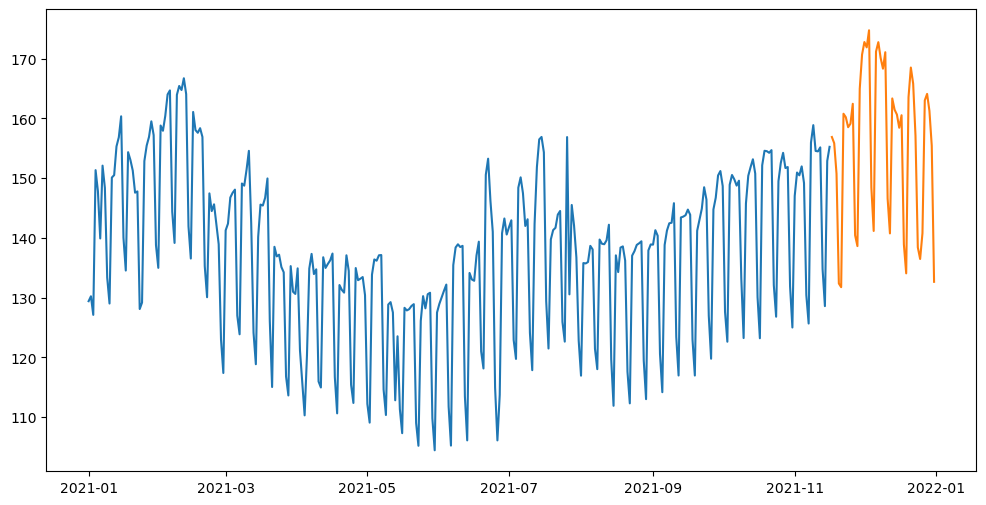

In [23]:
plt.figure(figsize=(12,6))

plt.plot(y_train.index, y_train.values[:, 0], label='Train Power')
plt.plot(y_test.index, y_test.values[:, 0], label='Test Power')
plt.plot(y_test.index, predictions.values, label='Predicted Power')

plt.legend(loc='upper left')

# Create second y-axis for the prices

plt.legend(loc='best')
#plt.title('Sarimax prediction of power consumption, price & tempe')
plt.show()

# SARIMAX (include temperature)

In [16]:
# Create train and test sets (using last 45 records for testing), ensuring both target and exogenous variable are included
train = commercial_df_2021_resampled[:-45]
test = commercial_df_2021_resampled[-45:]

# Fit a SARIMAX(0, 1, 1)x(1, 1, 1, 7) model
# Note: The last argument exog=train['Dew Point Temperature_P39'] adds the external variable 'Temperature'
model = SARIMAX(train['Power_Consumption'], order=(0, 1, 1), seasonal_order=(1, 1, 1, 7), exog=train['Dew Point Temperature_P39'])

# Fit the model
model_fit = model.fit(disp=False)

# Make predictions, include the 'Dew Point Temperature_P39' as an external variable again
predictions = model_fit.predict(len(train), len(train)+len(test)-1, exog=test[['Dew Point Temperature_P39']])


# Calculate MSE
mse= mean_squared_error(test['Power_Consumption'], predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Power_Consumption'], predictions))

# Calculate MAE
mae = mean_absolute_error(test['Power_Consumption'], predictions)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['Power_Consumption'], predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


MSE: 95.99433821407895
RMSE: 9.797670040069677
MAE: 7.794894971771497
MAPE: 4.9633333685489625


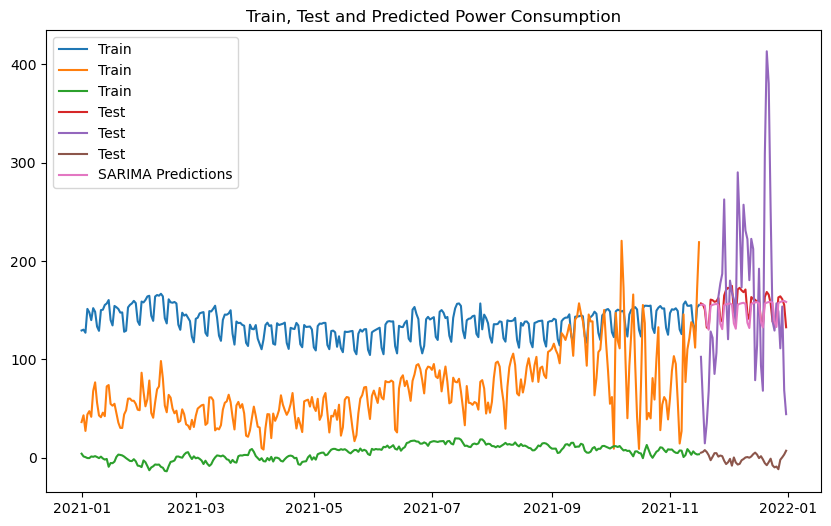

In [17]:
plt.figure(figsize=(10,6))

# Plot the training data
plt.plot(train.index, train.values, label='Train')

# Plot the testing data
plt.plot(test.index, test.values, label='Test')

# Plot the predicted data
plt.plot(test.index, predictions.values, label='SARIMA Predictions')

plt.legend(loc='best')
plt.title('Train, Test and Predicted Power Consumption')
plt.show()

# SARIMAX (include price and temperature)

In [25]:
# Create train and test sets (using last 45 records for testing), ensuring both target and exogenous variable are included
y_train, y_test = temporal_train_test_split(y, test_size=points_to_predict)

# Fit a SARIMAX(0, 1, 1)x(1, 1, 1, 7) model
# Note: The last argument exog=train['Price'] adds the external variable 'Price'
model = SARIMAX(y_train['Power_Consumption'], order=(0, 1, 1), seasonal_order=(1, 1, 1, 7), exog=y_train[['Price', 'Dew Point Temperature_P39']])

# Fit the model
model_fit = model.fit(disp=False)

# Make predictions, include the 'Price' as an external variable again
predictions = model_fit.predict(len(y_train), len(y_train)+len(y_test)-1, exog=y_test[['Price', 'Dew Point Temperature_P39']])

# Calculate MSE
mse= mean_squared_error(y_test['Power_Consumption'], predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test['Power_Consumption'], predictions))

# Calculate MAE
mae = mean_absolute_error(y_test['Power_Consumption'], predictions)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test['Power_Consumption'], predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


MSE: 133.7191765651187
RMSE: 11.563700816136619
MAE: 9.870562655506719
MAPE: 6.288508053721081


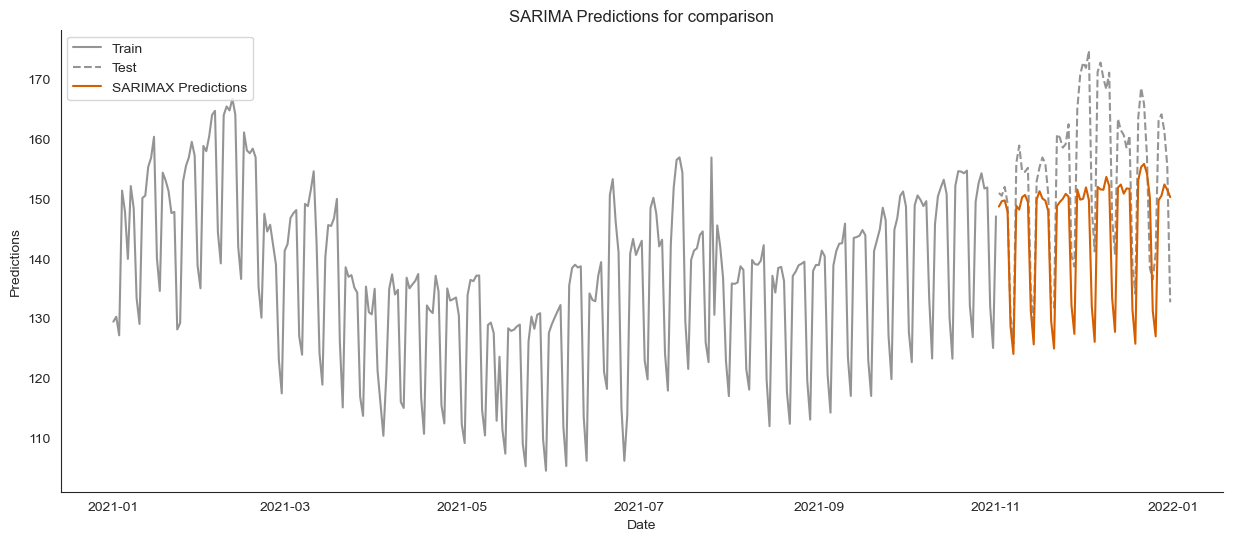

In [32]:
# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(y_train.values[:, 0], index=y_train.index)
y_test_pd = pd.Series(y_test.values[:, 0], index=y_test.index)
predictions_pd = pd.Series(predictions.values, index=y_test.index)

# "Husl" palette
palette = sns.color_palette('colorblind')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[7])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[7], linestyle="--")

# Plot the SARIMA predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='SARIMAX Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
ax.set_title('SARIMA Predictions for comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Predictions')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
plt.savefig('figures/SARIMAX_predictions_'+ year +'.pdf')
# Display the plot
plt.show()

Corr matrix just to double check

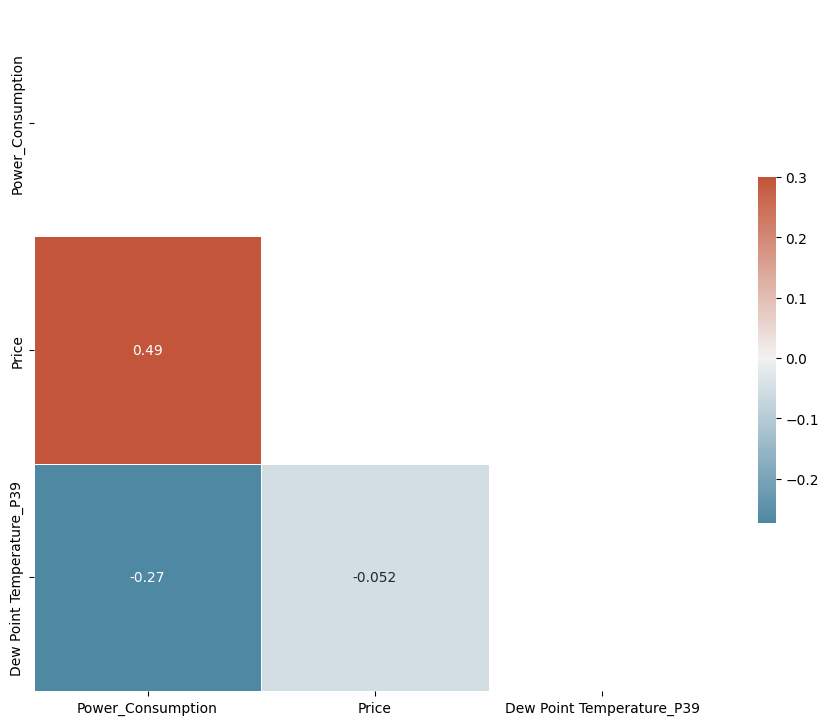

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = commercial_df_2021_resampled[['Power_Consumption', 'Price', 'Dew Point Temperature_P39']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [20]:
commercial_df_2021_resampled

,Power_Consumption,Price,Dew Point Temperature_P39
DateTime,,,
2021-01-01,129.406048,36.262917,4.133333
2021-01-02,130.231185,43.159167,1.345833
2021-01-03,127.118719,27.283333,0.658333
2021-01-04,151.340661,44.015833,-0.304167
2021-01-05,147.821185,47.370833,-0.379167
...,...,...,...
2021-12-27,163.020006,148.466667,-11.650000
2021-12-28,164.103905,111.252083,-2.041667
2021-12-29,161.262945,153.792083,0.454167


# XGBoost

In [36]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/45/6d/8c1d2570a52db6263d855c3ee3daf8f4bdf4a365cd6610772d6fce5fd904/xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 597.3 kB/s eta 0:00:0000:0100:01


In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import time
from sklearn import metrics
from sklearn.metrics import r2_score

# Splitting the data into features (X) and target variable (y)
X = commercial_df_2021_resampled[['Price', 'Dew Point Temperature_P39']]
y = commercial_df_2021_resampled['Power_Consumption']

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)
print("TRAIN:", xtrain.shape, "；  TEST:", xtest.shape)
print("TRAIN:", ytrain.shape, "；  TEST:", ytest.shape)

start = time.perf_counter()

# Define hyperparameters grid for GridSearchCV
cv_params = {
    'n_estimators': [50, 500],
    'max_depth': [1, 15],
    'learning_rate': [0.1, 0.2, 0.3, 0.4]
}

# Instantiate XGBRegressor
xg = xgb.XGBRegressor()

# Perform GridSearchCV
optimized_GBM = GridSearchCV(estimator=xg, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_GBM.fit(xtrain, ytrain)

end = time.perf_counter()
runtime = end - start
print("Runtime = ", runtime)

# Print best parameters and best model score
print('Best params：{0}'.format(optimized_GBM.best_params_))
print('Best model score:{0}'.format(optimized_GBM.best_score_))


TRAIN: (273, 2) ；  TEST: (92, 2)
TRAIN: (273,) ；  TEST: (92,)
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Runtime =  4.869486361996678
Best params：{'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 50}
Best model score:0.2943105772330932


In [38]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
xg = xgb.XGBRegressor(learning_rate=0.1, max_delta_step=0, max_depth=1,
                      min_child_weight=3,n_estimators=500, n_jobs=-1)
xg.fit(xtrain, ytrain)
xg_pre = xg.predict(xtest)
blk_ytest_np2 = np.array(ytest)

xg_lm = mean_squared_error(blk_ytest_np2, xg_pre)
print("xg_MSE:", xg_lm)
xg_lrm = np.sqrt(xg_lm)
print("xg_RMSE:", xg_lrm)
xg_mae = metrics.mean_absolute_error(blk_ytest_np2, xg_pre)
print("xg_MAE:", xg_mae)
xg_mape = mape(blk_ytest_np2, xg_pre)
print("xg_MAPE:", xg_mape)
xg_r2 = r2_score(blk_ytest_np2, xg_pre)
print("xg_score2:",xg_r2)

xg_MSE: 155.56025843943544
xg_RMSE: 12.472379822609454
xg_MAE: 9.89433970440543
xg_MAPE: 7.164650521772698
xg_score2: 0.22024118539882132


## XGBoost plot

In [42]:
xtest.index

DatetimeIndex(['2021-07-13', '2021-02-03', '2021-01-16', '2021-11-06',
               '2021-02-27', '2021-07-03', '2021-03-18', '2021-04-30',
               '2021-06-02', '2021-05-07', '2021-12-05', '2021-02-09',
               '2021-11-01', '2021-02-25', '2021-05-18', '2021-10-28',
               '2021-01-01', '2021-10-03', '2021-11-26', '2021-04-12',
               '2021-01-10', '2021-06-15', '2021-03-14', '2021-09-11',
               '2021-09-06', '2021-07-15', '2021-08-09', '2021-10-20',
               '2021-12-16', '2021-12-28', '2021-01-26', '2021-04-19',
               '2021-02-12', '2021-12-19', '2021-07-16', '2021-04-25',
               '2021-03-05', '2021-01-23', '2021-12-09', '2021-11-28',
               '2021-08-31', '2021-12-12', '2021-01-31', '2021-10-25',
               '2021-04-20', '2021-08-23', '2021-04-01', '2021-02-26',
               '2021-01-06', '2021-02-15', '2021-08-22', '2021-12-13',
               '2021-10-11', '2021-09-20', '2021-06-26', '2021-12-04',
      

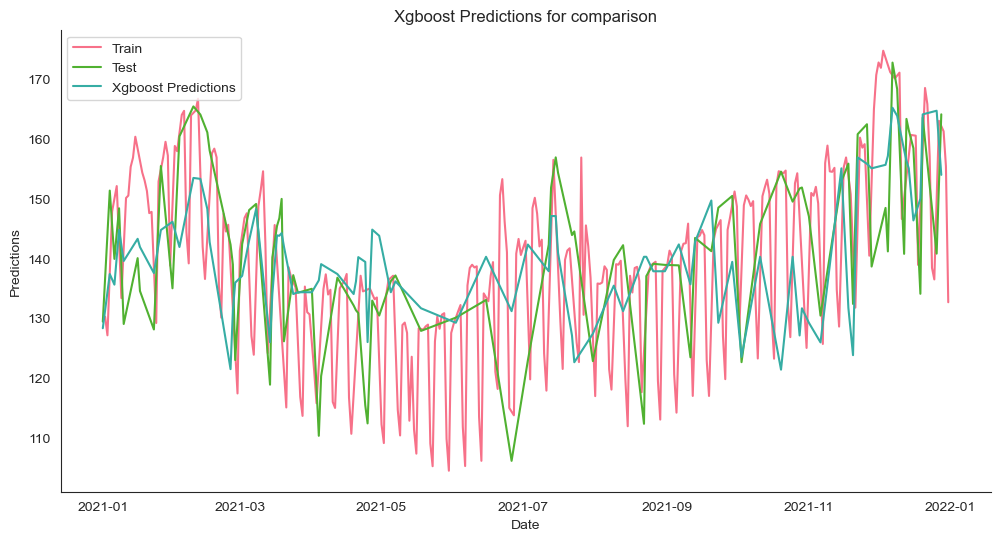

In [39]:
# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(ytrain, index=xtrain.index)
y_test_pd = pd.Series(ytest, index=xtest.index)
predictions_pd = pd.Series(xg_pre, index=xtest.index)

# "Husl" palette
palette = sns.color_palette('husl')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[0])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[2])

# Plot the Xgboost predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='Xgboost Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
ax.set_title('Xgboost Predictions for comparison')
ax.set_xlabel('Date')
ax.set_ylabel('Predictions')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
plt.savefig('figures/Xgboost_predictions.pdf')

# Display the plot
plt.show()

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

start = time.perf_counter()
other_params_rf = {'min_samples_split':2,
             'min_samples_leaf':2}
n_estimators = range(50,250,50)
max_depth = range(3,10,1)
cv_params_rf = dict(max_depth=max_depth, n_estimators=n_estimators)

forest_reg = RandomForestRegressor(**other_params_rf)
grid_search_rf = GridSearchCV(forest_reg, cv_params_rf, cv=5, n_jobs=-1, scoring='r2')
grid_search_rf.fit(xtrain, ytrain)
grid_search_rf.best_estimator_
#evalute_result = grid_search.cv_results_['mean_test_score']
end = time.perf_counter()
run_time = end - start
print('Running time: %s Seconds'%(run_time))
#print('Results of each iteration:{0}'.format(evalute_result))
print('Best params：{0}'.format(grid_search_rf.best_params_))
print('Best model score:{0}'.format(grid_search_rf.best_score_))

Running time: 7.53797773799306 Seconds
Best params：{'max_depth': 3, 'n_estimators': 50}
Best model score:0.3218288805054394


In [24]:
rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                          max_depth=5, max_leaf_nodes=None,max_samples=None, min_samples_leaf=2,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=50, n_jobs=-1, oob_score=False, verbose=0, warm_start=False)
rf.fit(xtrain, ytrain)
rf_pre = rf.predict(xtest)
ytest_np = np.array(ytest)

rf_lm = mean_squared_error(ytest_np, rf_pre)
print("rf_MSE:", rf_lm)
rf_lrm = np.sqrt(rf_lm)
print("rf_RMSE:", rf_lrm)
rf_mae = metrics.mean_absolute_error(ytest_np, rf_pre)
print("rf_MAE:", rf_mae)
rf_mape = mape(ytest_np, rf_pre)
print("rf_MAPE:", rf_mape)
rf_r2 = r2_score(ytest_np, rf_pre)
print("rf_score2:",rf_r2)

rf_MSE: 137.1713581909824
rf_RMSE: 11.712017682320258
rf_MAE: 9.412340243859456
rf_MAPE: 6.802379127832182
rf_score2: 0.3124170869009113


# Facebook prophet

In [44]:
#!pip install pystan
#!pip install holidays==0.25
#!pip install prophet==1.1.2

In [45]:
#!pip install --upgrade cmdstanpy convertdate pymeeus

In [46]:
#!pip install prophet

In [47]:
from prophet import Prophet

forecaster = Prophet()

df_prophet = y_train.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

forecaster.fit(df_prophet)

# Finally, when making predictions, you should also provide the 'Price' values for the respective dates
df_prophet_future = y_test.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

20:36:46 - cmdstanpy - INFO - Chain [1] start processing
20:36:47 - cmdstanpy - INFO - Chain [1] done processing


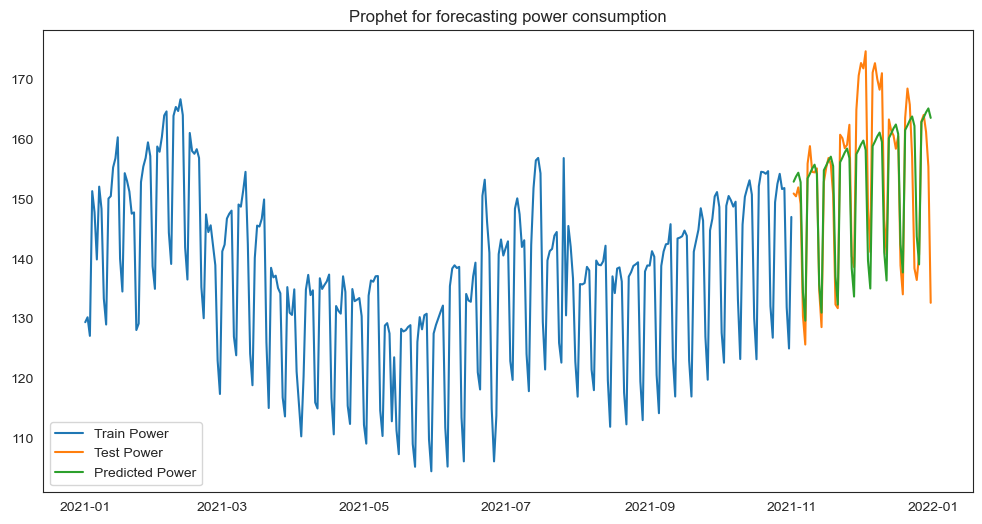

In [48]:
future_dates = y_test.reset_index()[['DateTime']]
future_dates.columns = ['ds']

y_pred = forecaster.predict(future_dates)

# Extract predictions
predictions = y_pred['yhat'][-len(y_test):]


In [56]:
# Calculate predictions
predictions = y_pred['yhat']
print(len(predictions))
# Calculate actual values
actual = y_test['Power_Consumption'].values
print(len(actual))

# Calculate MSE
mse= mean_squared_error(actual, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Calculate MAE
mae = mean_absolute_error(actual, predictions)

# Calculate MAPE

mape = mean_absolute_percentage_error(actual, predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


60
60
MSE: 98.45012063642835
RMSE: 9.922203416400428
MAE: 7.965636157536561
MAPE: 5.2349046037225335


# PROPHET WITH PRICE AND TEMPERATURE

In [57]:
forecaster = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)

# Add Sweden's holidays
forecaster.add_country_holidays(country_name="SE")

# Add 'Price' as a regressor
forecaster.add_regressor('Price')
forecaster.add_regressor('Dew Point Temperature_P39')
df_prophet = y_train.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

# Fill NaNs in 'Price' column of df_prophet
df_prophet['Price'] = df_prophet['Price'].fillna(0)

print(df_prophet['Price'].isna().sum())

forecaster.fit(df_prophet)

# Finally, when making predictions, you should also provide the 'Price' values for the respective dates
df_prophet_future = y_test.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})
# Fill NaNs in 'Price' column of df_prophet
df_prophet_future['Price'] = df_prophet_future['Price'].fillna(0)
print(df_prophet_future['Price'].isna().sum())

20:40:46 - cmdstanpy - INFO - Chain [1] start processing


0


20:40:46 - cmdstanpy - INFO - Chain [1] done processing


0


In [59]:
# Create future dates and attach future 'Price' values
future_dates = y_test.reset_index()[['DateTime', 'Price','Dew Point Temperature_P39']]
future_dates.columns = ['ds', 'Price','Dew Point Temperature_P39']
future_dates['Price'] = df_prophet_future['Price']
future_dates['Price'] = future_dates['Price'].fillna(0)
future_dates['Dew Point Temperature_P39'] = df_prophet_future['Dew Point Temperature_P39']
future_dates['Dew Point Temperature_P39'] = future_dates['Dew Point Temperature_P39'].fillna(0)
y_pred = forecaster.predict(future_dates)

# Extract predictions
predictions = y_pred['yhat'][-len(y_test):]

In [61]:
# Calculate predictions
predictions = y_pred['yhat']
print(len(predictions))
# Calculate actual values
actual = y_test['Power_Consumption'].values
print(len(actual))

# Calculate MSE
mse= mean_squared_error(actual, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Calculate MAE
mae = mean_absolute_error(actual, predictions)

# Calculate MAPE
mape = mean_absolute_percentage_error(actual, predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

60
60
MSE: 98.45012063642835
RMSE: 9.922203416400428
MAE: 7.965636157536561
MAPE: 5.2349046037225335


# Prophet with price, temperature, daily and weekly seasonality

In [89]:
from prophet import Prophet
forecaster = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=False)

# Add Sweden's holidays
#forecaster.add_country_holidays(country_name="SE")

# Add 'Price' as a regressor
forecaster.add_regressor('Price')
forecaster.add_regressor('Dew Point Temperature_P39')
df_prophet = y_train.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

# Fill NaNs in 'Price' column of df_prophet
df_prophet['Price'] = df_prophet['Price'].fillna(0)

print(df_prophet['Price'].isna().sum())

forecaster.fit(df_prophet)

# Finally, when making predictions, you should also provide the 'Price' values for the respective dates
df_prophet_future = y_test.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})
# Fill NaNs in 'Price' column of df_prophet
df_prophet_future['Price'] = df_prophet_future['Price'].fillna(0)
print(df_prophet_future['Price'].isna().sum())

20:52:28 - cmdstanpy - INFO - Chain [1] start processing
20:52:28 - cmdstanpy - INFO - Chain [1] done processing


0
0


In [90]:
# Create future dates and attach future 'Price' values
future_dates = y_test.reset_index()[['DateTime', 'Price','Dew Point Temperature_P39']]
future_dates.columns = ['ds', 'Price','Dew Point Temperature_P39']
future_dates['Price'] = df_prophet_future['Price']
future_dates['Price'] = future_dates['Price'].fillna(0)
future_dates['Dew Point Temperature_P39'] = df_prophet_future['Dew Point Temperature_P39']
future_dates['Dew Point Temperature_P39'] = future_dates['Dew Point Temperature_P39'].fillna(0)
y_pred = forecaster.predict(future_dates)

# Extract predictions
predictions = y_pred['yhat'][-len(y_test):]

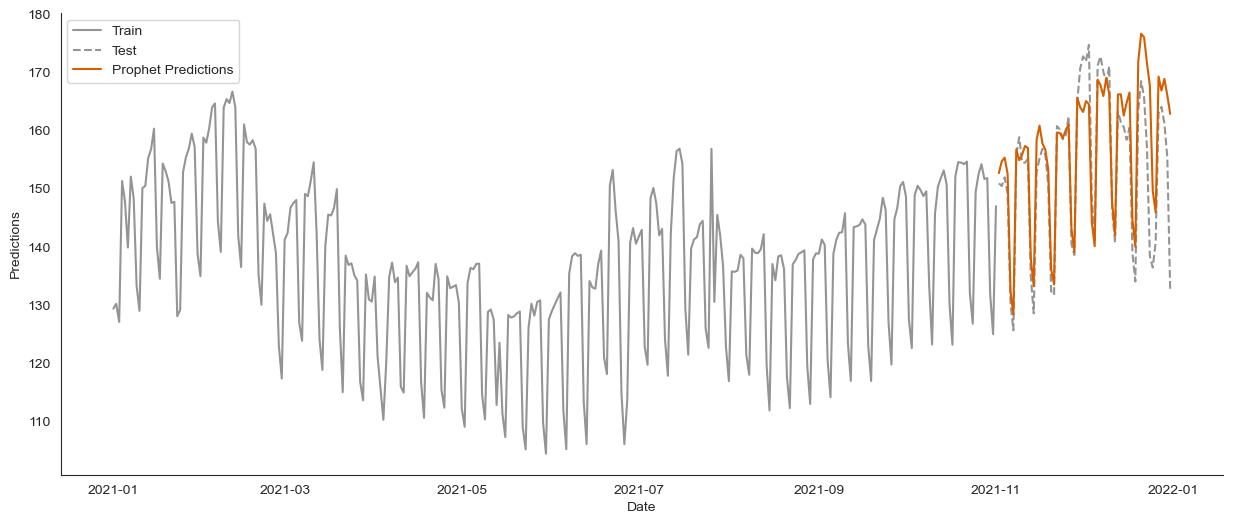

In [94]:
# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(y_train.values[:, 0], index=y_train.index)
y_test_pd = pd.Series(y_test.values[:, 0], index=y_test.index)
predictions_pd = pd.Series(predictions.values, index=y_test.index)

# "Husl" palette
palette = sns.color_palette('colorblind')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[7])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[7], linestyle="--")

# Plot the SARIMA predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='Prophet Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
#ax.set_title('Prophet Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Predictions')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
plt.savefig('figures/Prophet_predictions_'+ year +'.pdf')
# Display the plot
plt.show()

In [93]:
# Calculate predictions
predictions = y_pred['yhat']
print(len(predictions))
# Calculate actual values
actual = y_test['Power_Consumption'].values
print(len(actual))

# Calculate MSE
mse= mean_squared_error(actual, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Calculate MAE
mae = mean_absolute_error(actual, predictions)

# Calculate MAPE
mape = mean_absolute_percentage_error(actual, predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

60
60
MSE: 57.033112084692256
RMSE: 7.552027018270807
MAE: 5.058630542642059
MAPE: 3.354203601103113


# Prophet with seasonality and temperature only

In [39]:
forecaster = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)

# Add Sweden's holidays
forecaster.add_country_holidays(country_name="SE")
forecaster.add_regressor('Dew Point Temperature_P39')
df_prophet = y_train.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

forecaster.fit(df_prophet)
df_prophet_future = y_test.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

16:24:06 - cmdstanpy - INFO - Chain [1] start processing
16:24:06 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
# Create future dates and attach future 'Dew Point Temperature_P39' values
future_dates = y_test.reset_index()[['DateTime', 'Dew Point Temperature_P39']]
future_dates.columns = ['ds', 'Dew Point Temperature_P39']
future_dates
future_dates['Dew Point Temperature_P39'] = df_prophet_future['Dew Point Temperature_P39']
future_dates['Dew Point Temperature_P39'] = future_dates['Dew Point Temperature_P39'].fillna(0)
y_pred = forecaster.predict(future_dates)

# Extract predictions
predictions = y_pred['yhat'][-len(y_test):]

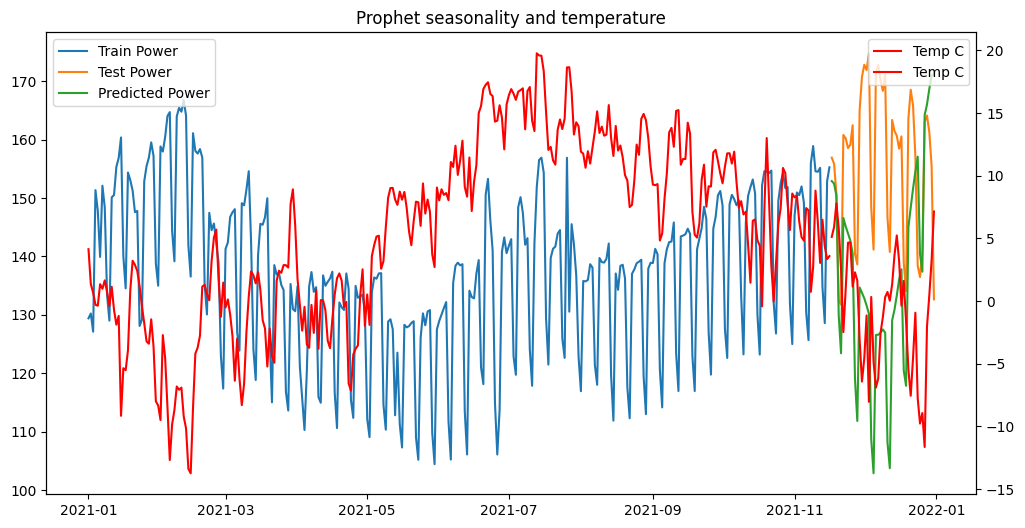

In [41]:
# Create plot
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train.values[:, 0], label='Train Power')
plt.plot(y_test.index, y_test.values[:, 0], label='Test Power')
plt.plot(y_test.index, predictions.values, label='Predicted Power')

plt.legend(loc='upper left')

# Create second y-axis for the prices

plt.title('Prophet seasonality and temperature')
# Plot prices on second y-axis
plt.twinx()
plt.plot(y_train.index, df_prophet['Dew Point Temperature_P39'], color='r', label='Temp C')
plt.plot(y_test.index, df_prophet_future['Dew Point Temperature_P39'], color='r', label='Temp C')

plt.legend(loc='upper right')

plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error

# Calculate predictions
predictions = y_pred['yhat']
print(len(predictions))
# Calculate actual values
actual = y_test['Power_Consumption'].values
print(len(actual))

# Calculate MSE
mse= mean_squared_error(actual, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Calculate MAE
mae = mean_absolute_error(actual, predictions)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual, predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

45
45
MSE: 738.982247802772
RMSE: 27.184227923609896
MAE: 22.91789850164507
MAPE: 14.534185082637896
